In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib as pyplot
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

sns.set()
%matplotlib inline

# To see all the commands result in a single kernal 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# To increase no. of rows and column visibility in outputs
pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_columns', 2000)
pd.set_option('display.width', 2000)

# To ignore warnings
import warnings
warnings.simplefilter('ignore')

# Loading and EDA

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_train.head()

,customer_id,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1,customer_category
0,csid_1,13.168425,9.447662,-0.070203,-0.139541,0.436956,4.705761,2.537985,7.959503,C,F,0
1,csid_2,17.092979,7.329056,0.153298,-0.102726,0.380340,4.205138,4.193444,17.517381,C,A,0
2,csid_3,17.505334,5.143676,0.106709,0.262834,0.417648,4.479070,3.878971,12.595155,C,BA,0
3,csid_4,31.423381,4.917740,-0.020226,-0.100526,0.778130,5.055535,2.708940,4.795073,AA,F,0
4,csid_5,11.909502,4.237073,0.187178,0.172891,0.162067,3.445247,3.677360,56.636326,C,AA,0


In [4]:
df_test.head()

,customer_id,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1
0,csid_10739,22.500174,3.702145,0.118811,0.093253,0.689237,5.786842,3.748009,7.661716,B,BA
1,csid_10740,13.225950,3.600102,0.130985,0.053575,0.142756,3.940359,3.469659,33.999679,B,AA
2,csid_10741,14.603376,5.084047,-0.004651,-0.036299,0.333709,4.254662,3.855939,33.485630,B,AA
3,csid_10742,26.149905,3.025501,0.229740,0.204591,3.768405,6.942625,2.362421,0.795372,B,BA
4,csid_10743,19.810630,5.020400,-0.011347,-0.028780,0.286841,4.585513,3.278624,15.052058,C,BA


<Figure size 1080x576 with 0 Axes>

<AxesSubplot:>

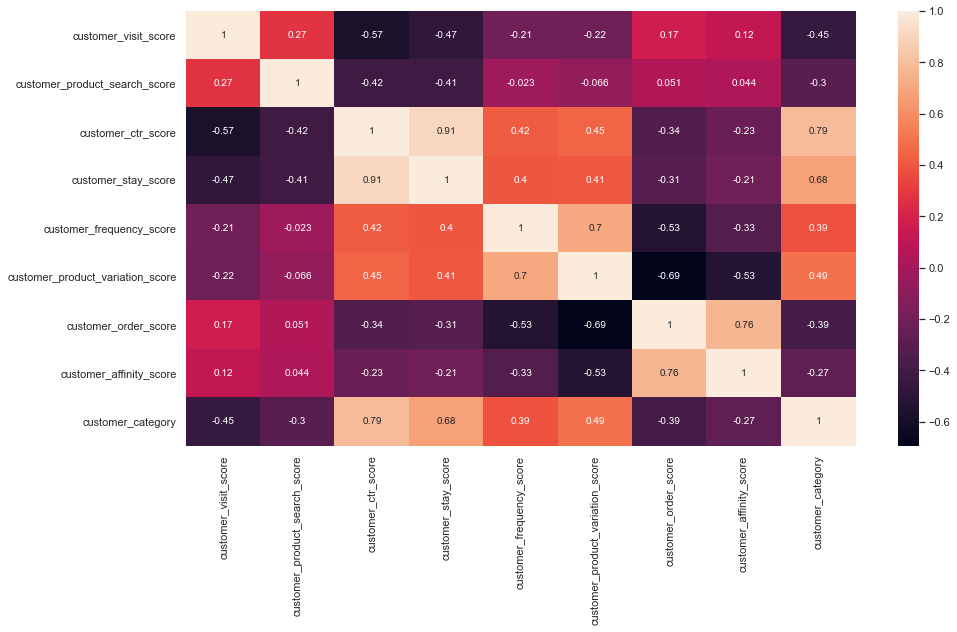

In [5]:
# Checking correlation
plt.figure(figsize=(15, 8))
sns.heatmap(df_train.corr(),annot=True)

In [6]:
# Target Variable Distribution

n = df_train['customer_category'].value_counts()[0] + df_train['customer_category'].value_counts()[1]
n0 = df_train['customer_category'].value_counts()[0]
n1 = df_train['customer_category'].value_counts()[1]

p_0 = n0 / n 
p_1 = n1 / n

print("Probliblity for class\t 0 : {}\t 1: {}".format(round(p_0, 3), round(p_1, 3)))

Probliblity for class	 0 : 0.879	 1: 0.121


It appears to be a moderately biased class with 0 being the majority class.

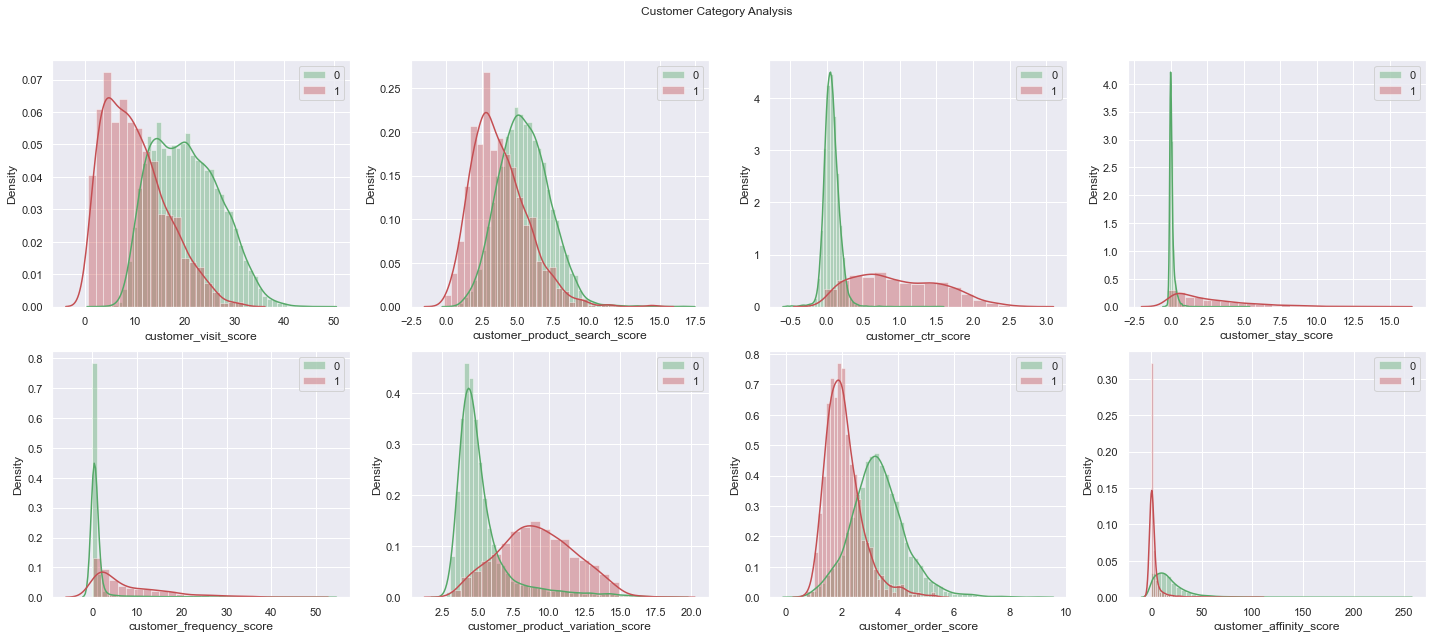

In [7]:
# Density plots for all numerical variables

fig = plt.figure(figsize = (20, 25))
j = 0

result = pd.DataFrame({'customer_category': df_train['customer_category']})
result.head()

cols = ['customer_visit_score', 'customer_product_search_score',\
       'customer_ctr_score', 'customer_stay_score', 'customer_frequency_score',\
       'customer_product_variation_score', 'customer_order_score',\
       'customer_affinity_score'
       ]

for i in cols:
    plt.subplot(6, 4, j+1)
    j += 1
    sns.distplot(df_train[i][result['customer_category']==0], color='g', label = '0')
    sns.distplot(df_train[i][result['customer_category']==1], color='r', label = '1')
    plt.legend(loc='best')
    
fig.suptitle('Customer Category Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show();


Observations:----

1. Customer affinity score has unusual distribution vs target variable around 0-5. So there is lack of linear relationship
and correlation but population density of minority target class is very high in a particular interval.
2. Customer ctr score and customer stay score seems to have strong prediction power.

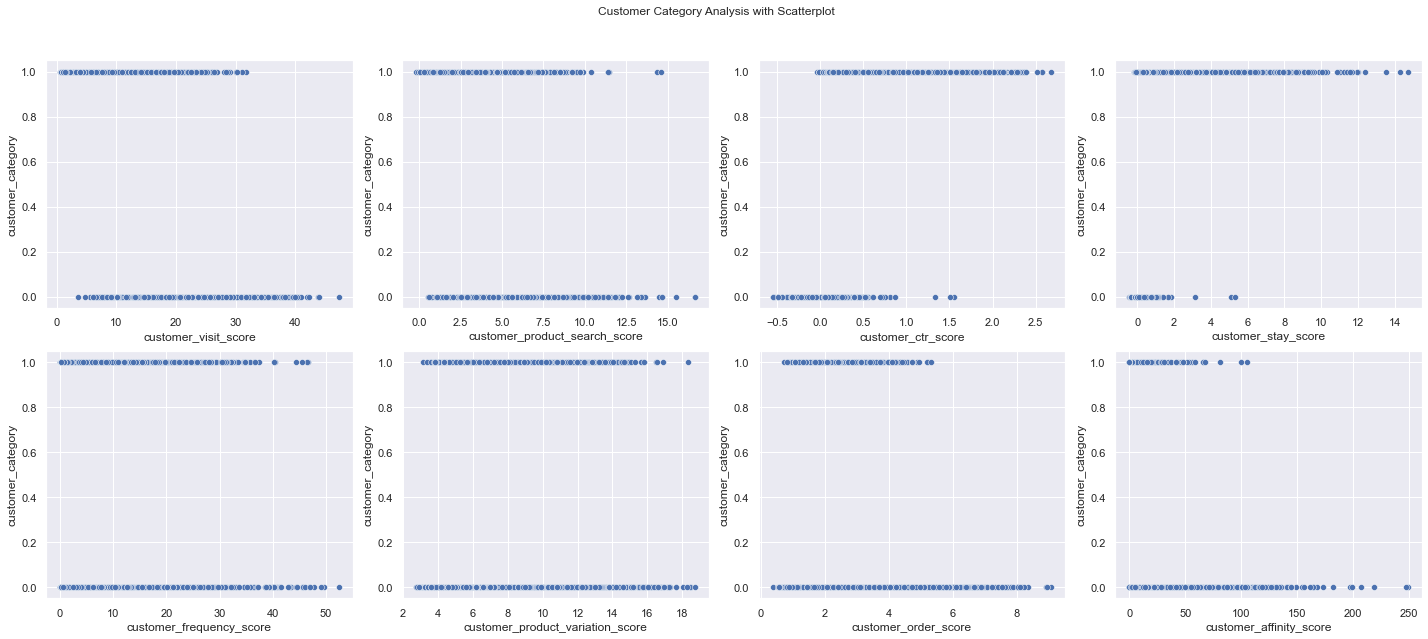

In [8]:
fig = plt.figure(figsize = (20, 25))
j = 0


cols = ['customer_visit_score', 'customer_product_search_score',\
       'customer_ctr_score', 'customer_stay_score', 'customer_frequency_score',\
       'customer_product_variation_score', 'customer_order_score',\
       'customer_affinity_score'
       ]
for i in cols:
    plt.subplot(6, 4, j+1)
    j += 1
    sns.scatterplot(x = df_train[i], y = df_train['customer_category'])
    
fig.suptitle('Customer Category Analysis with Scatterplot')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show();


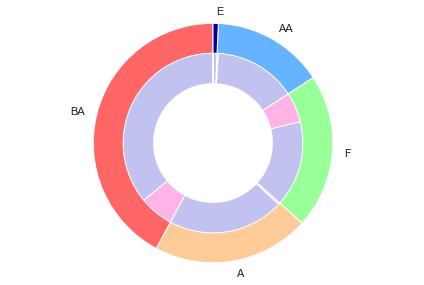

In [9]:
# Pie chart for X1
cat_var = 'X1'

labels = df_train[cat_var].value_counts().index.tolist()
label_len = len(labels)
sizes = df_train[cat_var].value_counts().tolist()

grouped1 = df_train.groupby([cat_var,'customer_category'], as_index = False).agg(count_var = ('customer_id', 'count'))
grouped2 = df_train.groupby([cat_var], as_index = False).agg(count_all = ('customer_id', 'count'))
grouped_final = grouped2.merge(grouped1, on = cat_var)
grouped_final = grouped_final.sort_values(['count_all','customer_category'], ascending = [False, True])

labels_gen = list(grouped_final['customer_category'])
sizes_gen = list(grouped_final['count_var'])

colors = ['#ff6666', '#ffcc99', '#99ff99', '#66b3ff', '#0000A0']
colors_gen = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6','#c2c2f0','#ffb3e6']
 
# Plot
plt.pie(sizes, labels=labels, colors=colors, startangle=90,frame=True)
plt.pie(sizes_gen,colors=colors_gen,radius=0.75,startangle=90)
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
 
plt.axis('equal')
plt.tight_layout()
plt.show();

Observation -

X1 segment has minimal density for minority class in A, AA and E segments.

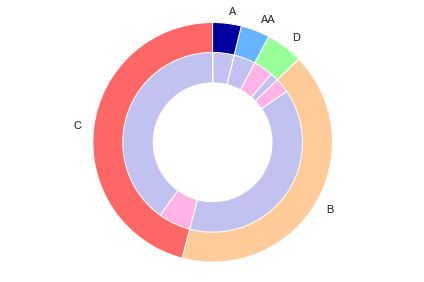

In [10]:
# Pie chart for customer_active_segment
cat_var = 'customer_active_segment'

labels = df_train[cat_var].value_counts().index.tolist()
label_len = len(labels)
sizes = df_train[cat_var].value_counts().tolist()

grouped1 = df_train.groupby([cat_var,'customer_category'], as_index = False).agg(count_var = ('customer_id', 'count'))
grouped2 = df_train.groupby([cat_var], as_index = False).agg(count_all = ('customer_id', 'count'))
grouped_final = grouped2.merge(grouped1, on = cat_var)
grouped_final = grouped_final.sort_values(['count_all','customer_category'], ascending = [False, True])

labels_gen = list(grouped_final['customer_category'])
sizes_gen = list(grouped_final['count_var'])

colors = ['#ff6666', '#ffcc99', '#99ff99', '#66b3ff', '#0000A0']
colors_gen = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6','#c2c2f0','#ffb3e6']
 
# Plot
plt.pie(sizes, labels=labels, colors=colors, startangle=90,frame=True)
plt.pie(sizes_gen,colors=colors_gen,radius=0.75,startangle=90)
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
 
plt.axis('equal')
plt.tight_layout()
plt.show();

Observation -

Customer active segment has minimal density for minority class in A and AA segments.

In [11]:
# Analysing distribution in Categorical varibales 
cat_cols = ['customer_active_segment', 'X1']
total_rows = len(df_train)

for col in cat_cols:
    print('----------------------------',col,'----------------------------')
    for cls,df_temp in df_train.groupby(col):
        n = df_temp['customer_category'].value_counts()[0] + df_temp['customer_category'].value_counts()[1]
        print('For class--> {} Rows: {} Total Percentage Contribution: {}'.format(cls,n,round(n/total_rows,3)))
        n0 = df_temp['customer_category'].value_counts()[0]
        n1 = df_temp['customer_category'].value_counts()[1]
        p_0 = n0 / n 
        p_1 = n1 / n
        print("Probliblity for \t 0 : {}\t 1: {}".format(round(p_0, 3), round(p_1, 3)))
        print('------------------------------------------------')
    #print('---------------------------------------------------------------')
        

---------------------------- customer_active_segment ----------------------------
For class--> A Rows: 412 Total Percentage Contribution: 0.038
Probliblity for 	 0 : 0.995	 1: 0.005
------------------------------------------------
For class--> AA Rows: 418 Total Percentage Contribution: 0.039
Probliblity for 	 0 : 0.995	 1: 0.005
------------------------------------------------
For class--> B Rows: 4430 Total Percentage Contribution: 0.413
Probliblity for 	 0 : 0.936	 1: 0.064
------------------------------------------------
For class--> C Rows: 4919 Total Percentage Contribution: 0.458
Probliblity for 	 0 : 0.873	 1: 0.127
------------------------------------------------
For class--> D Rows: 536 Total Percentage Contribution: 0.05
Probliblity for 	 0 : 0.289	 1: 0.711
------------------------------------------------
---------------------------- X1 ----------------------------
For class--> A Rows: 2268 Total Percentage Contribution: 0.211
Probliblity for 	 0 : 0.986	 1: 0.014
---------

# Data Preprocessing - Missing Value Handling and Dummy Variables

* Linear Regression is used to fill values for Numerical columns.
* New category "Missing" is created for Categorical Data, this will be later combined with other categorical label based on woe values.

In [12]:
# Checking Missing Values in Train Data

df_train.isna().sum()

customer_id                          0
customer_visit_score                 0
customer_product_search_score       42
customer_ctr_score                   0
customer_stay_score                 37
customer_frequency_score             0
customer_product_variation_score    46
customer_order_score                66
customer_affinity_score              0
customer_active_segment             23
X1                                  37
customer_category                    0
dtype: int64

In [13]:
# Checking Missing Values in Test Data

df_test.isna().sum()

customer_id                          0
customer_visit_score                 0
customer_product_search_score       29
customer_ctr_score                   0
customer_stay_score                 16
customer_frequency_score             0
customer_product_variation_score    43
customer_order_score                41
customer_affinity_score              0
customer_active_segment             12
X1                                  25
dtype: int64

In [14]:
# Merge and create a common df to fill in the missing nos

df_train['is_train'] = 1
df_test['is_train'] = 0

df_merged = df_train.append(df_test)

In [15]:
# Checking Missing Values in Test Data

df_merged2 = df_merged.copy()

df_merged2['MissingVs'] = df_merged2.isnull().sum(axis=1)
type(df_merged2)
df_merged2.sort_values(['MissingVs'], ascending = [False]).head()
df_merged2.shape

pandas.core.frame.DataFrame

,customer_id,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1,customer_category,is_train,MissingVs
438,csid_11177,7.210271,2.891116,0.300415,NaN,0.202760,4.266486,4.423772,35.923575,C,NaN,NaN,0,3
2642,csid_13381,14.596961,NaN,0.136018,-0.036231,0.442306,4.622707,3.976488,15.887772,B,A,NaN,0,2
411,csid_11150,31.686700,6.711721,0.035291,-0.117399,0.925731,5.895085,NaN,5.212109,AA,F,NaN,0,2
406,csid_11145,12.275635,4.549984,0.093164,0.039087,0.698296,NaN,2.906205,13.889706,B,BA,NaN,0,2
2179,csid_12918,13.820522,5.763300,0.075503,NaN,0.399563,3.945660,4.172976,31.372757,C,AA,NaN,0,2


(17898, 14)

Filling values with Deterministic Regression Imputation. In Deterministic Regression Imputation, we replace the missing data with the values predicted in our regression model and repeat this process for each variable. But since there is more than one missing Values in a row we will need to initially fill the blanks with some random no.

In [16]:
# Creating New Columns for Random Imputed columns

def random_impute(df, feature):
    number_missing = df[feature].isnull().sum()
    observed_values = df.loc[df[feature].notnull(), feature]
    df.loc[df[feature].isnull(), feature + '_imp'] = np.random.choice(observed_values, number_missing, replace = True)
    return df


In [17]:
missing_cols = [
        'customer_product_search_score','customer_ctr_score','customer_stay_score',
        'customer_frequency_score','customer_product_variation_score','customer_order_score',
        'customer_active_segment','X1']

for feature in missing_cols:
    df_merged[feature + '_imp'] = df_merged[feature]
    df_merged = random_impute(df_merged, feature)

#df_train.head()
#df_train.isna().sum()

df_merged.columns

Index(['customer_id', 'customer_visit_score', 'customer_product_search_score', 'customer_ctr_score', 'customer_stay_score', 'customer_frequency_score', 'customer_product_variation_score', 'customer_order_score', 'customer_affinity_score', 'customer_active_segment', 'X1', 'customer_category', 'is_train', 'customer_product_search_score_imp', 'customer_ctr_score_imp', 'customer_stay_score_imp', 'customer_frequency_score_imp', 'customer_product_variation_score_imp', 'customer_order_score_imp', 'customer_active_segment_imp', 'X1_imp'], dtype='object')

In [18]:
missing_cols_num = ['customer_product_search_score', 'customer_ctr_score', 'customer_stay_score',
                    'customer_frequency_score', 'customer_product_variation_score', 'customer_order_score']

missing_cols_cat = ['customer_active_segment', 'X1']

column_list_to_model = ['customer_visit_score', 'customer_affinity_score', 'customer_product_search_score_imp',\
                        'customer_ctr_score_imp', 'customer_stay_score_imp', 'customer_frequency_score_imp',\
                        'customer_product_variation_score_imp', 'customer_order_score_imp']

deter_data = pd.DataFrame(columns = ["Det" + name for name in missing_cols_num])

for feature in missing_cols_num:
        
    deter_data["Det" + feature] = df_merged[feature + "_imp"]
    parameters = list(set(column_list_to_model) - set(missing_cols_num) - {feature + '_imp'})
      
    #Create a Linear Regression model to estimate the missing data
    model = linear_model.LinearRegression()
    model.fit(X = df_merged.loc[~(df_merged[feature].isnull()), parameters],\
              y = df_merged.loc[~(df_merged[feature].isnull()), feature + '_imp'])
    
    deter_data.loc[df_merged[feature].isnull(), "Det" + feature] = model.predict(df_merged[parameters])\
                                                                        [df_merged[feature].isnull()]
    
deter_data.head()    

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

,Detcustomer_product_search_score,Detcustomer_ctr_score,Detcustomer_stay_score,Detcustomer_frequency_score,Detcustomer_product_variation_score,Detcustomer_order_score
0,9.447662,-0.070203,-0.139541,0.436956,4.705761,2.537985
1,7.329056,0.153298,-0.102726,0.380340,4.205138,4.193444
2,5.143676,0.106709,0.262834,0.417648,4.479070,3.878971
3,4.917740,-0.020226,-0.100526,0.778130,5.055535,2.708940
4,4.237073,0.187178,0.172891,0.162067,3.445247,3.677360


In [19]:
for col in missing_cols_num:
    df_merged[col] = deter_data['Det'+col]
    df_merged.drop(col+'_imp', axis = 1 ,inplace = True)
    
df_merged.to_csv('imputed_data.csv', index = False)
df_merged.head()


,customer_id,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1,customer_category,is_train,customer_active_segment_imp,X1_imp
0,csid_1,13.168425,9.447662,-0.070203,-0.139541,0.436956,4.705761,2.537985,7.959503,C,F,0.0,1,C,F
1,csid_2,17.092979,7.329056,0.153298,-0.102726,0.380340,4.205138,4.193444,17.517381,C,A,0.0,1,C,A
2,csid_3,17.505334,5.143676,0.106709,0.262834,0.417648,4.479070,3.878971,12.595155,C,BA,0.0,1,C,BA
3,csid_4,31.423381,4.917740,-0.020226,-0.100526,0.778130,5.055535,2.708940,4.795073,AA,F,0.0,1,AA,F
4,csid_5,11.909502,4.237073,0.187178,0.172891,0.162067,3.445247,3.677360,56.636326,C,AA,0.0,1,C,AA


In [20]:
missing_cols_cat = ['customer_active_segment', 'X1']

for feature in missing_cols_cat:
    df_merged.loc[df_merged[feature].isnull(), feature] = 'Missing'

In [21]:
# Encoding categorical columns

df_dummies = [pd.get_dummies(df_merged['customer_active_segment'], prefix = 'segment', prefix_sep = ':'),\
                     pd.get_dummies(df_merged['X1'], prefix = 'xvar', prefix_sep = ':')]

df_dummies = pd.concat(df_dummies, axis = 1)

In [22]:
type(df_dummies)

pandas.core.frame.DataFrame

In [23]:
df_dummies.shape

(17898, 12)

In [24]:
df_merged = pd.concat([df_merged, df_dummies], axis = 1)

In [25]:
df_merged.columns.values

# Dividing in train and test

train_df = df_merged[df_merged['is_train'] == 1]
test_df = df_merged[df_merged['is_train'] == 0]

array(['customer_id', 'customer_visit_score',
       'customer_product_search_score', 'customer_ctr_score',
       'customer_stay_score', 'customer_frequency_score',
       'customer_product_variation_score', 'customer_order_score',
       'customer_affinity_score', 'customer_active_segment', 'X1',
       'customer_category', 'is_train', 'customer_active_segment_imp',
       'X1_imp', 'segment:A', 'segment:AA', 'segment:B', 'segment:C',
       'segment:D', 'segment:Missing', 'xvar:A', 'xvar:AA', 'xvar:BA',
       'xvar:E', 'xvar:F', 'xvar:Missing'], dtype=object)


# Variable Binning using woe

In [26]:
df_inputs_prepr = train_df.drop('customer_category', axis = 1)
df_targets_prepr = train_df['customer_category']

In [27]:
# WoE function for discrete unordered variables
def woe_discrete(df, discrete_variabe_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variabe_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_1']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_1'] = df['prop_1'] * df['n_obs']
    df['n_0'] = (1 - df['prop_1']) * df['n_obs']
    df['prop_n_1'] = df['n_1'] / df['n_1'].sum()
    df['prop_n_0'] = df['n_0'] / df['n_0'].sum()
    df['WoE'] = np.log(df['prop_n_1'] / df['prop_n_0'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    df['diff_prop_1'] = df['prop_1'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_1'] - df['prop_n_0']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

In [28]:
def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    #x = df_WoE.iloc[:, 0]
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    y = df_WoE['WoE']
    plt.figure(figsize=(18, 6))
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('Weight of Evidence')
    plt.title(str('Weight of Evidence by ' + df_WoE.columns[0]))
    plt.xticks(rotation = rotation_of_x_axis_labels)

In [29]:
disc_var = 'X1'

df_temp = woe_discrete(df_inputs_prepr, disc_var, df_targets_prepr)
df_temp

,X1,n_obs,prop_1,prop_n_obs,n_1,n_0,prop_n_1,prop_n_0,WoE,diff_prop_1,diff_WoE,IV
0,AA,1611,0.013656,0.150028,22.0,1589.0,0.016988,0.168273,-2.293055,NaN,NaN,1.109829
1,A,2268,0.014109,0.211213,32.0,2236.0,0.024710,0.236789,-2.259945,0.000453,0.033110,1.109829
2,E,76,0.026316,0.007078,2.0,74.0,0.001544,0.007836,-1.624155,0.012206,0.635790,1.109829
3,Missing,37,0.108108,0.003446,4.0,33.0,0.003089,0.003495,-0.123450,0.081792,1.500705,1.109829
4,BA,4511,0.145866,0.420097,658.0,3853.0,0.508108,0.408027,0.219361,0.037758,0.342811,1.109829
5,F,2235,0.258166,0.208139,577.0,1658.0,0.445560,0.175580,0.931238,0.112300,0.711877,1.109829


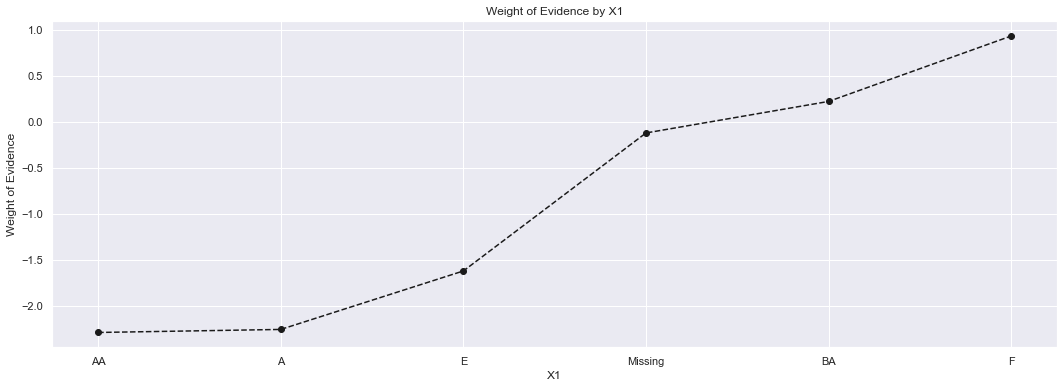

In [30]:
plot_by_woe(df_temp)

In [31]:
# Combining A, AA and E based on similar WOEs

df_merged['xvar:A_AA_E_Missing'] = sum([df_merged['xvar:A'], df_merged['xvar:AA'],
                                                      df_merged['xvar:Missing'],df_merged['xvar:E']])


In [32]:
df_merged.columns

Index(['customer_id', 'customer_visit_score', 'customer_product_search_score', 'customer_ctr_score', 'customer_stay_score', 'customer_frequency_score', 'customer_product_variation_score', 'customer_order_score', 'customer_affinity_score', 'customer_active_segment', 'X1', 'customer_category', 'is_train', 'customer_active_segment_imp', 'X1_imp', 'segment:A', 'segment:AA', 'segment:B', 'segment:C', 'segment:D', 'segment:Missing', 'xvar:A', 'xvar:AA', 'xvar:BA', 'xvar:E', 'xvar:F', 'xvar:Missing', 'xvar:A_AA_E_Missing'], dtype='object')

In [33]:
disc_var = 'customer_active_segment'

df_temp = woe_discrete(df_inputs_prepr, disc_var, df_targets_prepr)
df_temp

,customer_active_segment,n_obs,prop_1,prop_n_obs,n_1,n_0,prop_n_1,prop_n_0,WoE,diff_prop_1,diff_WoE,IV
0,AA,418,0.004785,0.038927,2.0,416.0,0.001544,0.044054,-3.350775,NaN,NaN,1.238243
1,A,412,0.004854,0.038368,2.0,410.0,0.001544,0.043418,-3.336247,0.000070,0.014528,1.238243
2,B,4430,0.064108,0.412554,284.0,4146.0,0.219305,0.439055,-0.694162,0.059254,2.642085,1.238243
3,Missing,23,0.086957,0.002142,2.0,21.0,0.001544,0.002224,-0.364612,0.022848,0.329550,1.238243
4,C,4919,0.126855,0.458093,624.0,4295.0,0.481853,0.454834,0.057707,0.039899,0.422319,1.238243
5,D,536,0.710821,0.049916,381.0,155.0,0.294208,0.016414,2.886137,0.583966,2.828431,1.238243


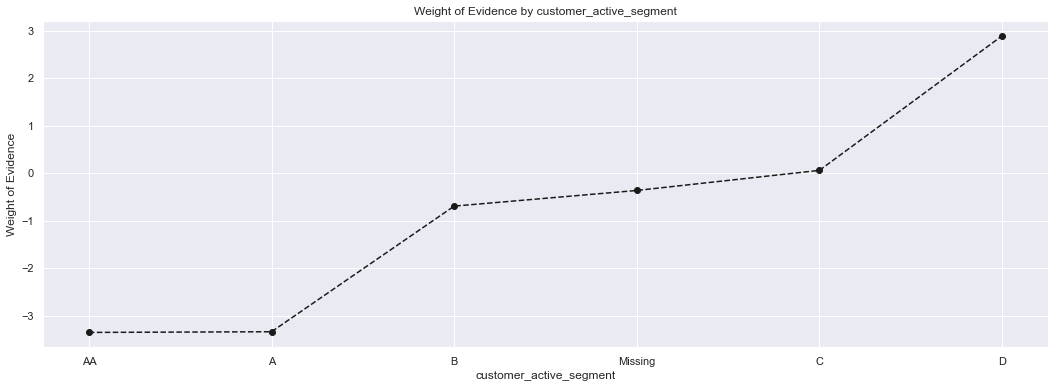

In [34]:
plot_by_woe(df_temp)

In [35]:
# Combining A, AA based on similar WOEs

df_merged['segment:A_AA'] = sum([df_merged['segment:A'], df_merged['segment:AA']])
df_merged['segment:B_Missing'] = sum([df_merged['segment:B'], df_merged['segment:Missing']])

Continuous Variable

In [36]:
# WoE function for ordered discrete and continuous variables
def woe_ordered_continuous(df, discrete_variabe_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variabe_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_1']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_1'] = df['prop_1'] * df['n_obs']
    df['n_0'] = (1 - df['prop_1']) * df['n_obs']
    df['prop_n_1'] = df['n_1'] / df['n_1'].sum()
    df['prop_n_0'] = df['n_0'] / df['n_0'].sum()
    df['WoE'] = np.log(df['prop_n_1'] / df['prop_n_0'])
    #df = df.sort_values(['WoE'])
    #df = df.reset_index(drop = True)
    df['diff_prop_1'] = df['prop_1'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_1'] - df['prop_n_0']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

In [37]:
train_df.columns

Index(['customer_id', 'customer_visit_score', 'customer_product_search_score', 'customer_ctr_score', 'customer_stay_score', 'customer_frequency_score', 'customer_product_variation_score', 'customer_order_score', 'customer_affinity_score', 'customer_active_segment', 'X1', 'customer_category', 'is_train', 'customer_active_segment_imp', 'X1_imp', 'segment:A', 'segment:AA', 'segment:B', 'segment:C', 'segment:D', 'segment:Missing', 'xvar:A', 'xvar:AA', 'xvar:BA', 'xvar:E', 'xvar:F', 'xvar:Missing'], dtype='object')

In [38]:
df_inputs_prepr['customer_visit_score_factor'] = pd.cut(df_inputs_prepr['customer_visit_score'], 50)

In [39]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'customer_visit_score_factor', df_targets_prepr)
#df_temp

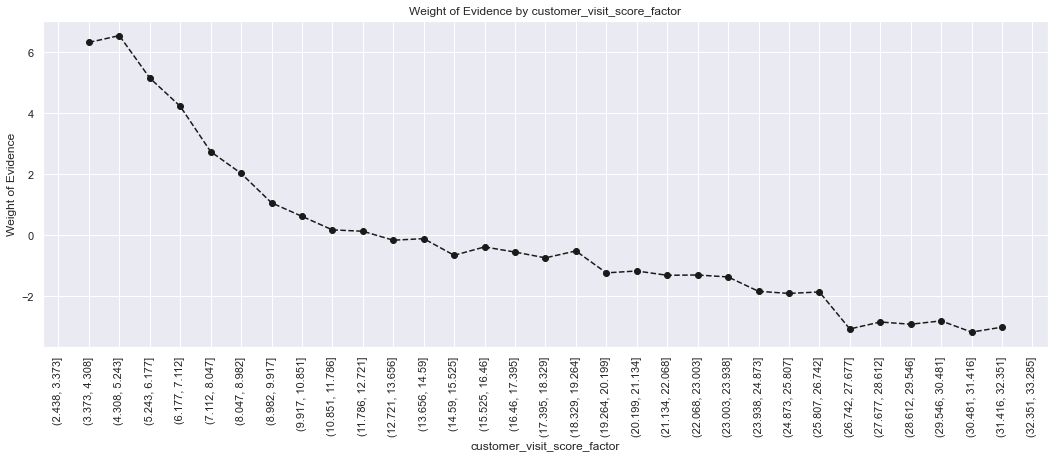

In [40]:
plot_by_woe(df_temp, 90)

In [41]:
df_merged['cvs:<5.243'] = np.where((df_merged['customer_visit_score'] <= 5.243), 1, 0)

df_merged['cvs:5.243-7.112'] = np.where((df_merged['customer_visit_score'] > 5.243) &\
                                               (df_merged['customer_visit_score'] <= 7.112), 1, 0)

df_merged['cvs:7.112-8.982'] = np.where((df_merged['customer_visit_score'] > 7.112) &\
                                               (df_merged['customer_visit_score'] <= 8.982), 1, 0)

df_merged['cvs:8.982-12.721'] = np.where((df_merged['customer_visit_score'] > 8.982) &\
                                               (df_merged['customer_visit_score'] <= 12.721), 1, 0)

df_merged['cvs:12.721-19.264'] = np.where((df_merged['customer_visit_score'] > 12.721) &\
                                               (df_merged['customer_visit_score'] <= 19.264), 1, 0)

df_merged['cvs:19.264-23.938'] = np.where((df_merged['customer_visit_score'] > 19.264) &\
                                               (df_merged['customer_visit_score'] <= 23.938), 1, 0)

df_merged['cvs:23.938-26.742'] = np.where((df_merged['customer_visit_score'] > 23.938) &\
                                               (df_merged['customer_visit_score'] <= 26.742), 1, 0)

df_merged['cvs:26.742-32.351'] = np.where((df_merged['customer_visit_score'] > 26.742) &\
                                               (df_merged['customer_visit_score'] <= 32.351), 1, 0)

df_merged['cvs:>32.351'] = np.where((df_merged['customer_visit_score'] > 32.351), 1, 0)

In [42]:
#customer_product_search_score

df_inputs_prepr['customer_product_search_score_factor'] = pd.cut(df_inputs_prepr['customer_product_search_score'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'customer_product_search_score_factor', df_targets_prepr)
#df_temp

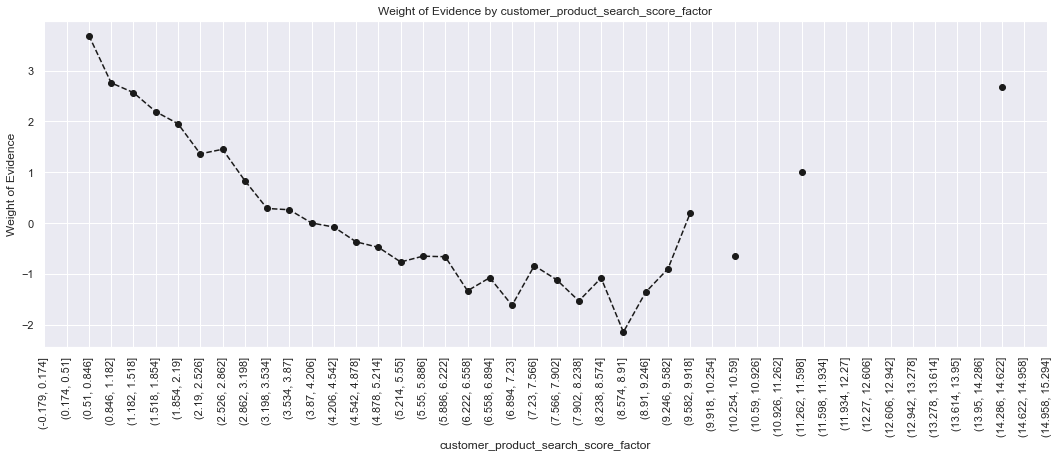

In [43]:
plot_by_woe(df_temp, 90)

In [44]:
df_merged['cpss:<1.518'] = np.where((df_merged['customer_product_search_score'] <= 1.518), 1, 0)

df_merged['cpss:1.518-2.19'] = np.where((df_merged['customer_product_search_score'] > 1.518) &\
                                               (df_merged['customer_product_search_score'] <= 2.19), 1, 0)

df_merged['cpss:2.19-2.862'] = np.where((df_merged['customer_product_search_score'] > 2.19) &\
                                               (df_merged['customer_product_search_score'] <= 2.862), 1, 0)

df_merged['cpss:2.862-3.87'] = np.where((df_merged['customer_product_search_score'] > 2.862) &\
                                               (df_merged['customer_product_search_score'] <= 3.87), 1, 0)

df_merged['cpss:3.87-5.214'] = np.where((df_merged['customer_product_search_score'] > 3.87) &\
                                               (df_merged['customer_product_search_score'] <= 5.214), 1, 0)

df_merged['cpss:5.214-6.222'] = np.where((df_merged['customer_product_search_score'] > 5.214) &\
                                               (df_merged['customer_product_search_score'] <= 6.222), 1, 0)

df_merged['cpss:6.222-7.23'] = np.where((df_merged['customer_product_search_score'] > 6.222) &\
                                               (df_merged['customer_product_search_score'] <= 7.23), 1, 0)

df_merged['cpss:>7.23'] = np.where((df_merged['customer_product_search_score'] > 7.23), 1, 0)

In [45]:
#customer_ctr_score

df_inputs_prepr['customer_ctr_score_factor'] = pd.cut(df_inputs_prepr['customer_ctr_score'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'customer_ctr_score_factor', df_targets_prepr)
#df_temp

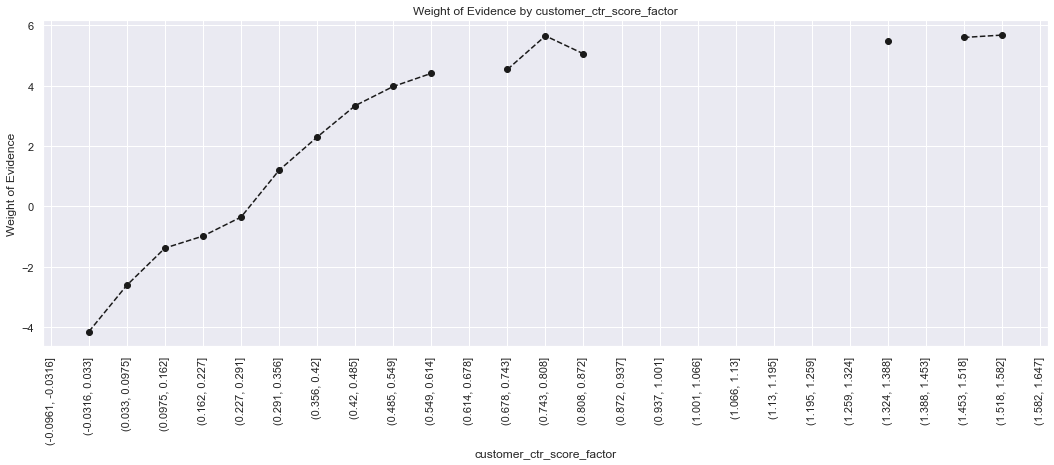

In [46]:
plot_by_woe(df_temp, 90)

In [47]:
df_merged['ccs:<-0.0316'] = np.where((df_merged['customer_ctr_score'] <= -0.0316), 1, 0)

df_merged['ccs:-0.0316-0.033'] = np.where((df_merged['customer_ctr_score'] > -0.0316) &\
                                               (df_merged['customer_ctr_score'] <= 0.033), 1, 0)

df_merged['ccs:0.033-0.0975'] = np.where((df_merged['customer_ctr_score'] > 0.033) &\
                                               (df_merged['customer_ctr_score'] <= 0.0975), 1, 0)

df_merged['ccs:0.0975-0.162'] = np.where((df_merged['customer_ctr_score'] > 0.0975) &\
                                               (df_merged['customer_ctr_score'] <= 0.162), 1, 0)

df_merged['ccs:0.162-0.227'] = np.where((df_merged['customer_ctr_score'] > 0.162) &\
                                               (df_merged['customer_ctr_score'] <= 0.227), 1, 0)

df_merged['ccs:0.227-0.291'] = np.where((df_merged['customer_ctr_score'] > 0.227) &\
                                               (df_merged['customer_ctr_score'] <= 0.291), 1, 0)

df_merged['ccs:0.291-0.356'] = np.where((df_merged['customer_ctr_score'] > 0.291) &\
                                               (df_merged['customer_ctr_score'] <= 0.356), 1, 0)

df_merged['ccs:0.356-0.549'] = np.where((df_merged['customer_ctr_score'] > 0.356) &\
                                               (df_merged['customer_ctr_score'] <= 0.549), 1, 0)

df_merged['ccs:>0.549'] = np.where((df_merged['customer_ctr_score'] > 0.549), 1, 0)

In [48]:
#customer_ctr_score

df_inputs_prepr['customer_stay_score_factor'] = pd.cut(df_inputs_prepr['customer_stay_score'], 70)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'customer_stay_score_factor', df_targets_prepr)
#df_temp

In [49]:

df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['customer_stay_score'] <= 1.218, : ]
df_inputs_prepr_temp["customer_stay_score_factor"] = pd.cut(df_inputs_prepr_temp['customer_stay_score'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'customer_stay_score_factor', df_targets_prepr[df_inputs_prepr_temp.index])
#df_temp

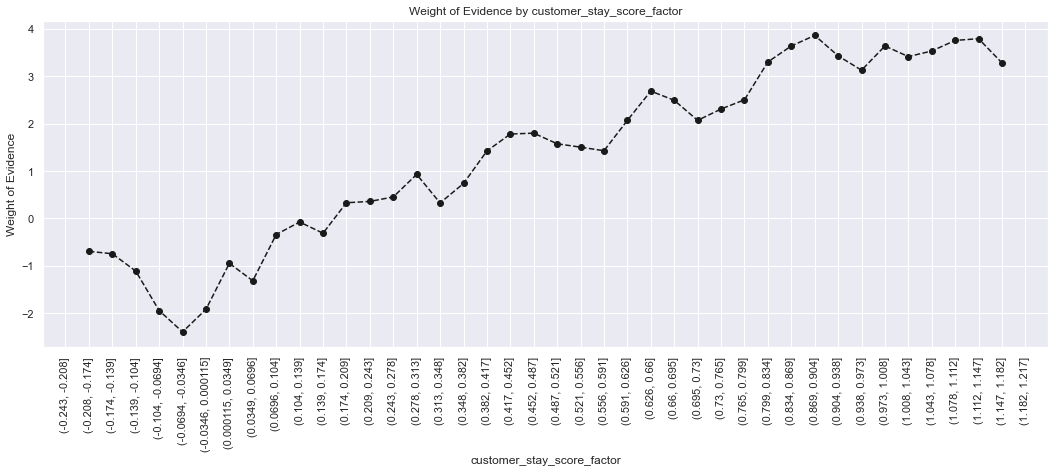

In [50]:
plot_by_woe(df_temp, 90)

In [51]:
df_merged['css:<0.000058'] = np.where((df_merged['customer_stay_score'] <= -0.0000586), 1, 0)

df_merged['css:0.000058-0.0695'] = np.where((df_merged['customer_stay_score'] > -0.0000586) &\
                                               (df_merged['customer_stay_score'] <= 0.0695), 1, 0)

df_merged['css:0.0695-0.174'] = np.where((df_merged['customer_stay_score'] > 0.0695) &\
                                               (df_merged['customer_stay_score'] <= 0.174), 1, 0)

df_merged['css:0.174-0.382'] = np.where((df_merged['customer_stay_score'] > 0.174) &\
                                               (df_merged['customer_stay_score'] <= 0.382), 1, 0)

df_merged['css:0.382-0.591'] = np.where((df_merged['customer_stay_score'] > 0.382) &\
                                               (df_merged['customer_stay_score'] <= 0.591), 1, 0)

df_merged['css:0.591-0.799'] = np.where((df_merged['customer_stay_score'] > 0.591) &\
                                               (df_merged['customer_stay_score'] <= 0.799), 1, 0)

df_merged['css:0.799-1.218'] = np.where((df_merged['customer_stay_score'] > 0.799) &\
                                               (df_merged['customer_stay_score'] <= 1.218), 1, 0)

df_merged['css:>1.218'] = np.where((df_merged['customer_stay_score'] > 1.218), 1, 0)

In [52]:
#customer_frequency_score

df_inputs_prepr['customer_frequency_score_factor'] = pd.cut(df_inputs_prepr['customer_frequency_score'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'customer_frequency_score_factor', df_targets_prepr)
#df_temp

In [53]:
df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['customer_frequency_score'] <= 3.171, : ]

df_inputs_prepr_temp["customer_frequency_score_factor"] = pd.cut(df_inputs_prepr_temp['customer_frequency_score'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'customer_frequency_score_factor', df_targets_prepr[df_inputs_prepr_temp.index])
#df_temp

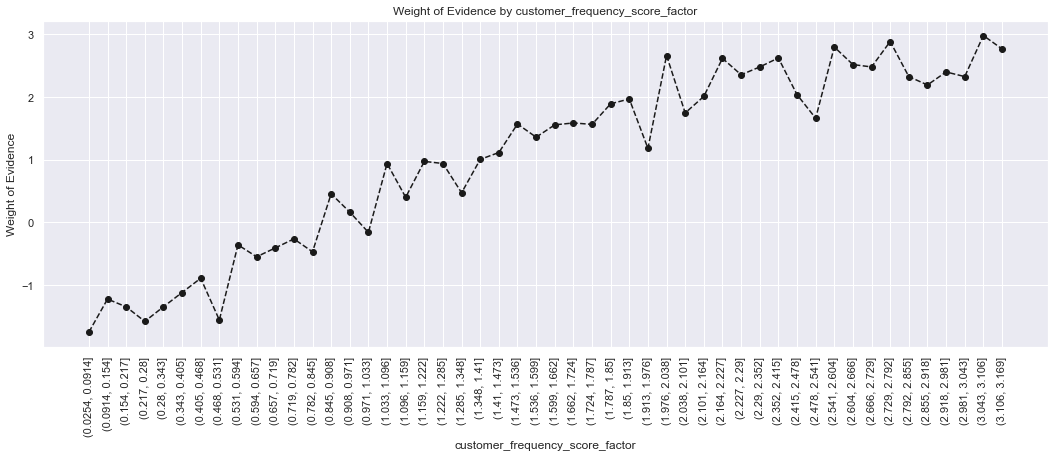

In [54]:
plot_by_woe(df_temp, 90)

In [55]:
df_merged['cfs:<0.531'] = np.where((df_merged['customer_frequency_score'] <= 0.531), 1, 0)


df_merged['cfs:0.531-0.845'] = np.where((df_merged['customer_frequency_score'] > 0.531) &\
                                               (df_merged['customer_frequency_score'] <= 0.845), 1, 0)

df_merged['cfs:0.845-1.033'] = np.where((df_merged['customer_frequency_score'] > 0.845) &\
                                               (df_merged['customer_frequency_score'] <= 1.033), 1, 0)

df_merged['cfs:1.033-1.473'] = np.where((df_merged['customer_frequency_score'] > 1.033) &\
                                               (df_merged['customer_frequency_score'] <= 1.473), 1, 0)

df_merged['cfs:1.473-1.976'] = np.where((df_merged['customer_frequency_score'] > 1.473) &\
                                               (df_merged['customer_frequency_score'] <= 1.976), 1, 0)

df_merged['cfs:1.976-2.541'] = np.where((df_merged['customer_frequency_score'] > 1.976) &\
                                               (df_merged['customer_frequency_score'] <= 2.541), 1, 0)

df_merged['cfs:2.541-3.171'] = np.where((df_merged['customer_frequency_score'] > 2.541) &\
                                               (df_merged['customer_frequency_score'] <= 3.171), 1, 0)

df_merged['cfs:>3.171'] = np.where((df_merged['customer_frequency_score'] > 3.171), 1, 0)

In [56]:
# customer_product_variation_score

df_inputs_prepr['customer_product_variation_score_factor'] = pd.cut(df_inputs_prepr['customer_product_variation_score'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'customer_product_variation_score_factor', df_targets_prepr)
#df_temp

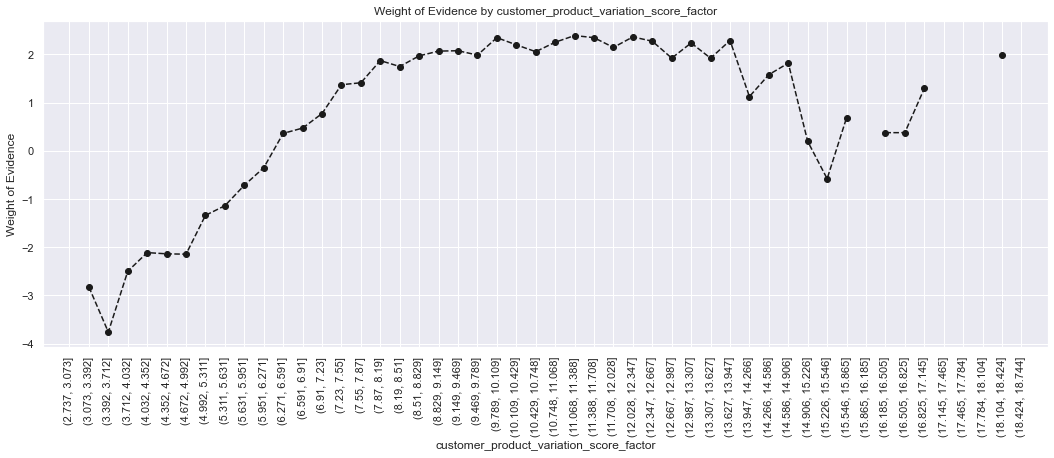

In [57]:
plot_by_woe(df_temp, 90)

In [58]:
# Bucket vars customer_product_variation_score

df_merged['cpvs:<3.712'] = np.where((df_merged['customer_product_variation_score'] <= 3.712), 1, 0)


df_merged['cpvs:3.712-4.992'] = np.where((df_merged['customer_product_variation_score'] > 3.712) &\
                                               (df_merged['customer_product_variation_score'] <= 4.992), 1, 0)

df_merged['cpvs:4.992-6.271'] = np.where((df_merged['customer_product_variation_score'] > 4.992) &\
                                               (df_merged['customer_product_variation_score'] <= 6.271), 1, 0)

df_merged['cpvs:6.271-7.23'] = np.where((df_merged['customer_product_variation_score'] > 6.271) &\
                                               (df_merged['customer_product_variation_score'] <= 7.23), 1, 0)

df_merged['cpvs:7.23-7.87'] = np.where((df_merged['customer_product_variation_score'] > 7.23) &\
                                               (df_merged['customer_product_variation_score'] <= 7.87), 1, 0)

df_merged['cpvs:7.87-13.947'] = np.where((df_merged['customer_product_variation_score'] > 7.87) &\
                                               (df_merged['customer_product_variation_score'] <= 13.947), 1, 0)

df_merged['cpvs:13.947-14.906'] = np.where((df_merged['customer_product_variation_score'] > 13.947) &\
                                               (df_merged['customer_product_variation_score'] <= 14.906), 1, 0)

df_merged['cpvs:>14.906'] = np.where((df_merged['customer_product_variation_score'] > 14.906), 1, 0)

In [59]:
# customer_order_score

df_inputs_prepr['customer_order_score_factor'] = pd.cut(df_inputs_prepr['customer_order_score'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'customer_order_score_factor', df_targets_prepr)
#df_temp

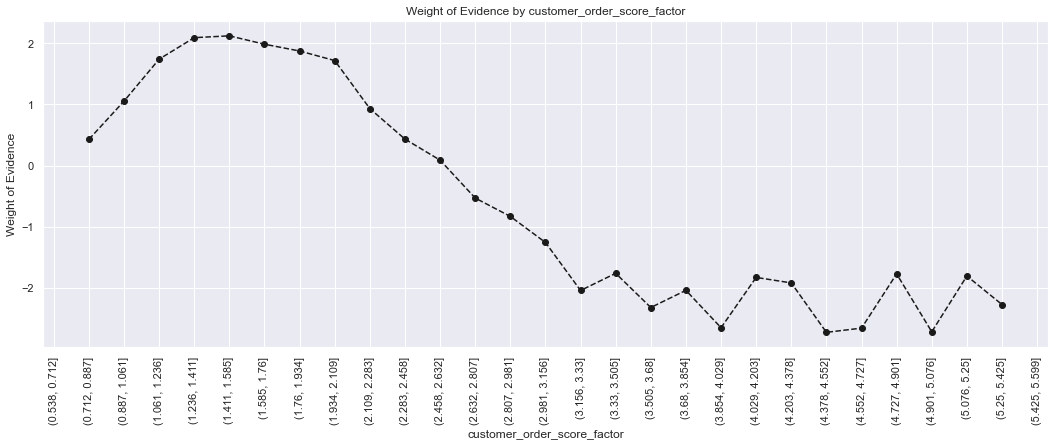

In [60]:
plot_by_woe(df_temp, 90)

In [61]:
# Bucket variables customer_order_score

df_merged['cos:<1.061'] = np.where((df_merged['customer_order_score'] <= 1.061), 1, 0)


df_merged['cos:1.061-2.109'] = np.where((df_merged['customer_order_score'] > 1.061) &\
                                               (df_merged['customer_order_score'] <= 2.109), 1, 0)

df_merged['cos:2.109-2.632'] = np.where((df_merged['customer_order_score'] > 2.109) &\
                                               (df_merged['customer_order_score'] <= 2.632), 1, 0)

df_merged['cos:2.632-3.156'] = np.where((df_merged['customer_order_score'] > 2.632) &\
                                               (df_merged['customer_order_score'] <= 3.156), 1, 0)

df_merged['cos:3.156-3.854'] = np.where((df_merged['customer_order_score'] > 3.156) &\
                                               (df_merged['customer_order_score'] <= 3.854), 1, 0)

df_merged['cos:>3.854'] = np.where((df_merged['customer_order_score'] > 3.854), 1, 0)

In [62]:
# customer_affinity_score

df_inputs_prepr['customer_affinity_score_factor'] = pd.cut(df_inputs_prepr['customer_affinity_score'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'customer_affinity_score_factor', df_targets_prepr)
#df_temp

In [63]:
df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['customer_affinity_score'] <= 14.456, : ]

df_inputs_prepr_temp["customer_affinity_score_factor"] = pd.cut(df_inputs_prepr_temp['customer_affinity_score'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'customer_affinity_score_factor', df_targets_prepr[df_inputs_prepr_temp.index])
#df_temp

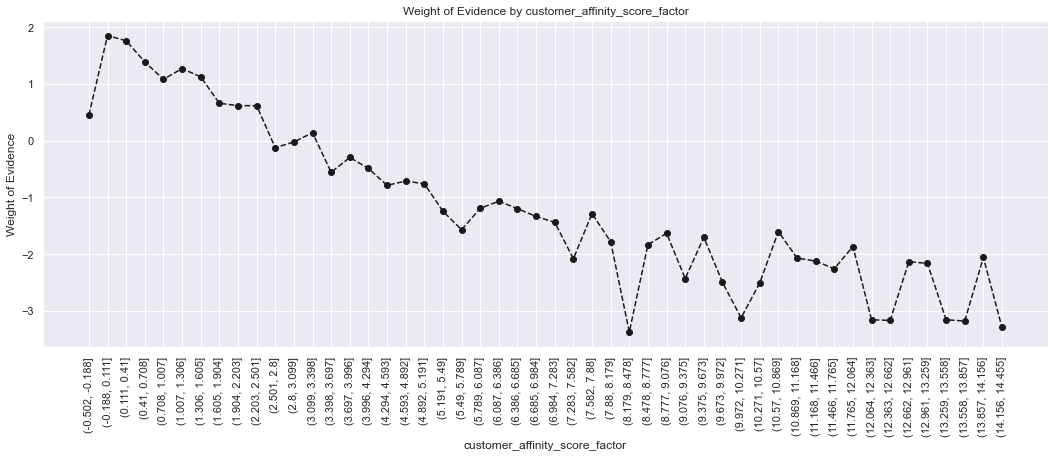

In [64]:
plot_by_woe(df_temp, 90)

In [65]:
# Bucket vars customer_affinity_score

df_merged['cas:<-0.188'] = np.where((df_merged['customer_affinity_score'] <= -0.188), 1, 0)


df_merged['cas:-0.188-0.41'] = np.where((df_merged['customer_affinity_score'] > -0.188) &\
                                               (df_merged['customer_affinity_score'] <= 0.41), 1, 0)

df_merged['cas:0.41-1.605'] = np.where((df_merged['customer_affinity_score'] > 0.41) &\
                                               (df_merged['customer_affinity_score'] <= 1.605), 1, 0)

df_merged['cas:1.605-2.501'] = np.where((df_merged['customer_affinity_score'] > 1.605) &\
                                               (df_merged['customer_affinity_score'] <= 2.501), 1, 0)

df_merged['cas:2.501-3.398'] = np.where((df_merged['customer_affinity_score'] > 2.501) &\
                                               (df_merged['customer_affinity_score'] <= 3.398), 1, 0)

df_merged['cas:3.398-5.191'] = np.where((df_merged['customer_affinity_score'] > 3.398) &\
                                               (df_merged['customer_affinity_score'] <= 5.191), 1, 0)

df_merged['cas:5.191-7.582'] = np.where((df_merged['customer_affinity_score'] > 5.191) &\
                                               (df_merged['customer_affinity_score'] <= 7.582), 1, 0)

df_merged['cas:7.582-9.375'] = np.where((df_merged['customer_affinity_score'] > 7.582) &\
                                               (df_merged['customer_affinity_score'] <= 9.375), 1, 0)

df_merged['cas:9.375-12.064'] = np.where((df_merged['customer_affinity_score'] > 9.375) &\
                                               (df_merged['customer_affinity_score'] <= 12.064), 1, 0)

df_merged['cas:>12.064'] = np.where((df_merged['customer_affinity_score'] > 12.064), 1, 0)


In [66]:
df_merged.columns

Index(['customer_id', 'customer_visit_score', 'customer_product_search_score', 'customer_ctr_score', 'customer_stay_score', 'customer_frequency_score', 'customer_product_variation_score', 'customer_order_score', 'customer_affinity_score', 'customer_active_segment', 'X1', 'customer_category', 'is_train', 'customer_active_segment_imp', 'X1_imp', 'segment:A', 'segment:AA', 'segment:B', 'segment:C', 'segment:D', 'segment:Missing', 'xvar:A', 'xvar:AA', 'xvar:BA', 'xvar:E', 'xvar:F', 'xvar:Missing', 'xvar:A_AA_E_Missing', 'segment:A_AA', 'segment:B_Missing', 'cvs:<5.243', 'cvs:5.243-7.112', 'cvs:7.112-8.982', 'cvs:8.982-12.721', 'cvs:12.721-19.264', 'cvs:19.264-23.938', 'cvs:23.938-26.742', 'cvs:26.742-32.351', 'cvs:>32.351', 'cpss:<1.518', 'cpss:1.518-2.19', 'cpss:2.19-2.862', 'cpss:2.862-3.87', 'cpss:3.87-5.214', 'cpss:5.214-6.222', 'cpss:6.222-7.23', 'cpss:>7.23', 'ccs:<-0.0316', 'ccs:-0.0316-0.033', 'ccs:0.033-0.0975', 'ccs:0.0975-0.162', 'ccs:0.162-0.227', 'ccs:0.227-0.291', 'ccs:0.291-

In [67]:
all_vars = ['xvar:BA','xvar:F','xvar:A_AA_E','segment:B','segment:C','segment:D','segment:A_AA','cvs:<5.243',\
            'cvs:5.243-7.112','cvs:7.112-8.982','cvs:8.982-12.721','cvs:12.721-19.264','cvs:19.264-23.938',\
            'cvs:23.938-26.742','cvs:26.742-32.351','cvs:>32.351','cpss:<1.518','cpss:1.518-2.19','cpss:2.19-2.862',\
            'cpss:2.862-3.87','cpss:3.87-5.214','cpss:5.214-6.222','cpss:6.222-7.23','cpss:>7.23','ccs:<-0.0316',\
            'ccs:-0.0316-0.033','ccs:0.033-0.0975','ccs:0.0975-0.162','ccs:0.162-0.227','ccs:0.227-0.291',\
            'ccs:0.291-0.356','ccs:0.356-0.549','ccs:>0.549','css:<0.000058','css:0.000058-0.0695','css:0.0695-0.174',\
            'css:0.174-0.382','css:0.382-0.591','css:0.591-0.799','css:0.799-1.218','css:>1.218','cfs:<0.531',\
            'cfs:0.531-0.845','cfs:0.845-1.033','cfs:1.033-1.473','cfs:1.473-1.976','cfs:1.976-2.541','cfs:2.541-3.171',\
            'cfs:>3.171','cpvs:<3.712','cpvs:3.712-4.992','cpvs:4.992-6.271','cpvs:6.271-7.23','cpvs:7.23-7.87',\
            'cpvs:7.87-13.947','cpvs:13.947-14.906','cpvs:>14.906','cos:<1.061','cos:1.061-2.109','cos:2.109-2.632',\
            'cos:2.632-3.156','cos:3.156-3.854','cos:>3.854','cas:<-0.188','cas:-0.188-0.41','cas:0.41-1.605',\
            'cas:1.605-2.501','cas:2.501-3.398','cas:3.398-5.191','cas:5.191-7.582','cas:7.582-9.375','cas:9.375-12.064',\
            'cas:>12.064']

In [68]:
ref_vars = ['xvar:A_AA_E','segment:A_AA','cvs:>32.351','cpss:>7.23','ccs:<-0.0316','css:<0.000058','cfs:<0.531',\
            'cpvs:<3.712','cos:>3.854','cas:>12.064']

In [69]:
to_use_vars = list(set(all_vars)-set(ref_vars))

In [70]:
# Dividing in train and test

train_df = df_merged[df_merged['is_train'] == 1]
test_df = df_merged[df_merged['is_train'] == 0]

train_df.drop(['customer_id','is_train'], axis = 1, inplace = True)
train_df.drop(['customer_active_segment_imp', 'X1_imp'], axis = 1, inplace = True)

# 'X1', 'customer_active_segment'

In [71]:
train_df.columns

Index(['customer_visit_score', 'customer_product_search_score', 'customer_ctr_score', 'customer_stay_score', 'customer_frequency_score', 'customer_product_variation_score', 'customer_order_score', 'customer_affinity_score', 'customer_active_segment', 'X1', 'customer_category', 'segment:A', 'segment:AA', 'segment:B', 'segment:C', 'segment:D', 'segment:Missing', 'xvar:A', 'xvar:AA', 'xvar:BA', 'xvar:E', 'xvar:F', 'xvar:Missing', 'xvar:A_AA_E_Missing', 'segment:A_AA', 'segment:B_Missing', 'cvs:<5.243', 'cvs:5.243-7.112', 'cvs:7.112-8.982', 'cvs:8.982-12.721', 'cvs:12.721-19.264', 'cvs:19.264-23.938', 'cvs:23.938-26.742', 'cvs:26.742-32.351', 'cvs:>32.351', 'cpss:<1.518', 'cpss:1.518-2.19', 'cpss:2.19-2.862', 'cpss:2.862-3.87', 'cpss:3.87-5.214', 'cpss:5.214-6.222', 'cpss:6.222-7.23', 'cpss:>7.23', 'ccs:<-0.0316', 'ccs:-0.0316-0.033', 'ccs:0.033-0.0975', 'ccs:0.0975-0.162', 'ccs:0.162-0.227', 'ccs:0.227-0.291', 'ccs:0.291-0.356', 'ccs:0.356-0.549', 'ccs:>0.549', 'css:<0.000058', 'css:0.000

# Feature Selection using Backward Elimination

In [72]:
# Reference Variables --> 'xvar:F',  'segment:D'

linear_cols = ['customer_visit_score', 'customer_ctr_score', 'customer_stay_score',\
               'customer_frequency_score', 'customer_product_variation_score', 'customer_order_score',\
               ]

non_linear_cols = ['customer_product_search_score', 'customer_affinity_score']

non_linear_cat_columns = ['cpss:<1.518', 'cpss:1.518-2.19', 'cpss:2.19-2.862', 'cpss:2.862-3.87', 'cpss:3.87-5.214',\
                          'cpss:5.214-6.222', 'cpss:6.222-7.23', \
                          'cas:<-0.188', 'cas:-0.188-0.41', 'cas:0.41-1.605', 'cas:1.605-2.501', 'cas:2.501-3.398',\
                          'cas:3.398-5.191', 'cas:5.191-7.582', 'cas:7.582-9.375', 'cas:9.375-12.064'\
                         ]

cat_vars = ['segment:D','segment:B_Missing', 'segment:C',\
               'xvar:F','xvar:BA']

"""
#ref --> , 'cas:>12.064','cpss:>7.23',

#model_cols = to_use_vars

extra_vars = ['xvar:A_AA_E','segment:A_AA','cvs:<5.243','cvs:>32.351','cpss:<1.518','cpss:>7.23','ccs:<-0.0316',\
              'ccs:>0.549','css:<0.000058','css:>1.218','cfs:<0.531','cfs:>3.171','cpvs:<3.712','cpvs:>14.906',\
              'cos:<1.061','cos:>3.854','cas:<-0.188','cas:>12.064']

model_cols = ['customer_visit_score','customer_product_search_score', 'customer_ctr_score','customer_stay_score',\
              'customer_frequency_score', 'customer_product_variation_score', 'customer_order_score',\
       'customer_affinity_score', 'segment:B', 'segment:C', 'xvar:BA']

model_cols = model_cols+ref_vars
"""

"\n#ref --> , 'cas:>12.064','cpss:>7.23',\n\n#model_cols = to_use_vars\n\nextra_vars = ['xvar:A_AA_E','segment:A_AA','cvs:<5.243','cvs:>32.351','cpss:<1.518','cpss:>7.23','ccs:<-0.0316',              'ccs:>0.549','css:<0.000058','css:>1.218','cfs:<0.531','cfs:>3.171','cpvs:<3.712','cpvs:>14.906',              'cos:<1.061','cos:>3.854','cas:<-0.188','cas:>12.064']\n\nmodel_cols = ['customer_visit_score','customer_product_search_score', 'customer_ctr_score','customer_stay_score',              'customer_frequency_score', 'customer_product_variation_score', 'customer_order_score',       'customer_affinity_score', 'segment:B', 'segment:C', 'xvar:BA']\n\nmodel_cols = model_cols+ref_vars\n"

In [73]:
import statsmodels.api as sm

selected_columns = ['customer_visit_score', 'customer_product_search_score',\
       'customer_ctr_score', 'customer_frequency_score',\
       'customer_product_variation_score', 'customer_order_score',\
       'customer_affinity_score',\
        'segment:AA', 'segment:B', 'segment:C', 'segment:D',\
        'xvar:AA', 'xvar:BA', 'xvar:E', 'xvar:F'\
       ]

def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()
    return x, columns

SL = 0.05
data_modeled, selected_columns = backwardElimination(train_df.loc[:,selected_columns].values,\
                                                     train_df.loc[:,['customer_category']].values, SL, selected_columns)

print(selected_columns)


['customer_visit_score' 'customer_product_search_score'
 'customer_ctr_score' 'customer_frequency_score'
 'customer_product_variation_score' 'customer_order_score' 'segment:B'
 'segment:C' 'segment:D' 'xvar:AA' 'xvar:BA' 'xvar:E' 'xvar:F']


# ROC CURVE FUNCTION

In [74]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

def plot_roc(y_train, y_train_pred):
    # Compute ROC curve and ROC area for each class
    fpr, tpr, thresholds = roc_curve(y_train, y_train_pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=1 , linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
    

# Model Fitting - Logistic Regression

In [75]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [76]:
#non_linear_cols
model_cols = linear_cols + non_linear_cat_columns + cat_vars

X_train = train_df[model_cols]
y_train = train_df['customer_category']
X_test = test_df[model_cols]

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Training the Logistic Regression model on the Training set
from sklearn.linear_model import LogisticRegression
classifier_log = LogisticRegression(solver='liblinear', random_state=0)
#classifier_log.fit(train_X[model_cols], train_y)
classifier_log.fit(X_train,y_train)

classifier_log.score(X_train, y_train)
confusion_matrix(y_train, classifier_log.predict(X_train))


LogisticRegression(random_state=0, solver='liblinear')

0.976345688210095

array([[9402,   41],
       [ 213, 1082]], dtype=int64)

In [77]:
y_train_log = classifier_log.predict(X_train)

y_test_log = classifier_log.predict(X_test)
final_df_log = pd.DataFrame({'customer_id':test_df['customer_id'], 'customer_category':y_test_log})
final_df_log.to_csv('fin_sub_log.csv', index = False)

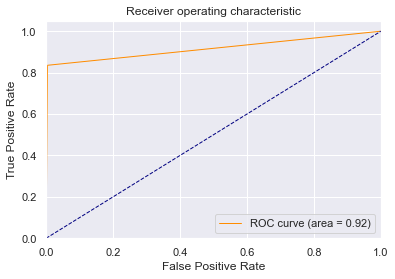

In [78]:

plot_roc(y_train, y_train_log)    

# Model Fitting - Kernal SVC

In [79]:
#non_linear_cols
model_cols = linear_cols + non_linear_cat_columns + cat_vars

X_train = train_df[model_cols]
y_train = train_df['customer_category']
X_test = test_df[model_cols]

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Training the Kernel SVM model on the Training set
from sklearn.svm import SVC
classifier_sc = SVC(kernel = 'rbf', random_state = 0)
#classifier.fit(train_X[model_cols], train_y)
classifier_sc.fit(X_train,y_train)

classifier_sc.score(X_train, y_train)
confusion_matrix(y_train, classifier_sc.predict(X_train))


#classifier.score(test_X[model_cols], test_y)
#confusion_matrix(test_y, classifier.predict(test_X[model_cols]))


SVC(random_state=0)

0.9742037623393556

array([[9418,   25],
       [ 252, 1043]], dtype=int64)

In [80]:
y_train_svc = classifier_sc.predict(X_train)
y_test_svc = classifier_sc.predict(X_test)
final_df_svc = pd.DataFrame({'customer_id':test_df['customer_id'], 'customer_category':y_test_svc})
final_df_svc.to_csv('fin_sub_svc_rbf.csv', index = False)


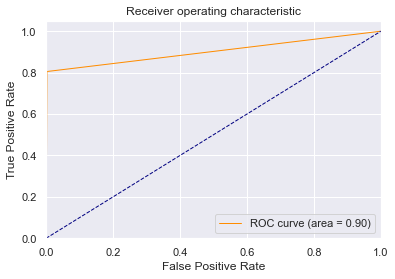

In [81]:
plot_roc(y_train, y_train_svc)    

# Model Fitting - KNN

In [82]:
# non_linear_cat_columns
model_cols = linear_cols + non_linear_cols + cat_vars

X_train = train_df[model_cols]
y_train = train_df['customer_category']
X_test = test_df[model_cols]

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Training the K-NN model on the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(n_neighbors = 4, metric = 'minkowski', p = 2)
#classifier.fit(train_X[model_cols], train_y)
classifier_knn.fit(X_train,y_train)

classifier_knn.score(X_train, y_train)
confusion_matrix(y_train, classifier_knn.predict(X_train))



KNeighborsClassifier(n_neighbors=4)

0.9726205997392438

array([[9424,   19],
       [ 275, 1020]], dtype=int64)

In [83]:
y_train_knn = classifier_knn.predict(X_train)
y_test_knn = classifier_knn.predict(X_test)
final_df_svc = pd.DataFrame({'customer_id':test_df['customer_id'], 'customer_category':y_test_knn})
final_df_svc.to_csv('fin_sub_knn4.csv', index = False)


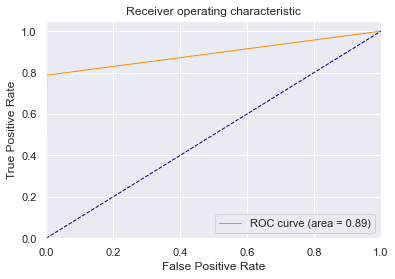

In [84]:
plot_roc(y_train, y_train_knn)

# Model Fitting - Decision Tree

In [85]:
# non_linear_cat_columns
model_cols = linear_cols + non_linear_cols + cat_vars

X_train = train_df[model_cols]
y_train = train_df['customer_category']
X_test = test_df[model_cols]

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Training the Decision Tree Classification model on the Training set
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier(random_state = 0, max_depth = 7)
#classifier.fit(train_X[model_cols], train_y)
classifier_dt.fit(X_train,y_train)

classifier_dt.score(X_train, y_train)
confusion_matrix(y_train, classifier_dt.predict(X_train))


DecisionTreeClassifier(max_depth=7, random_state=0)

0.984354628422425

array([[9415,   28],
       [ 140, 1155]], dtype=int64)

In [86]:
y_train_dt = classifier_dt.predict(X_train)
y_test_dt = classifier_dt.predict(X_test)
final_df_dt = pd.DataFrame({'customer_id':test_df['customer_id'], 'customer_category':y_test_dt})
final_df_dt.to_csv('fin_sub_dt.csv', index = False)


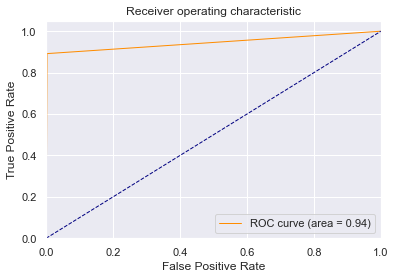

In [87]:
plot_roc(y_train, y_train_dt)

# Model Fitting - Random Forest

In [88]:
# non_linear_cat_columns
model_cols = linear_cols + non_linear_cols + cat_vars

X_train = train_df[model_cols]
y_train = train_df['customer_category']
X_test = test_df[model_cols]

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Training the Random Forest Classification model on the Training set
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0, max_depth = 7)
#classifier.fit(train_X[model_cols], train_y)
classifier_rf.fit(X_train,y_train)

classifier_rf.score(X_train, y_train)
confusion_matrix(y_train, classifier_rf.predict(X_train))


RandomForestClassifier(criterion='entropy', max_depth=7, n_estimators=10,
                       random_state=0)

0.9789532501396908

array([[9403,   40],
       [ 186, 1109]], dtype=int64)

In [89]:
y_train_rf = classifier_rf.predict(X_train)
y_test_rf = classifier_rf.predict(X_test)
final_df_rf = pd.DataFrame({'customer_id':test_df['customer_id'], 'customer_category':y_test_rf})
final_df_rf.to_csv('fin_sub_rf.csv', index = False)


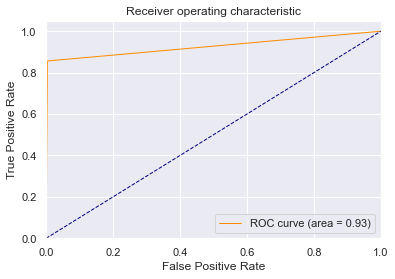

In [90]:
plot_roc(y_train, y_train_rf)

# Model Fitting - XGBoost

In [91]:
# non_linear_cat_columns
model_cols = linear_cols + non_linear_cols + cat_vars

X_train = train_df[model_cols]
y_train = train_df['customer_category']
X_test = test_df[model_cols]

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Training the XGBoost Classification model on the Training set
from xgboost import XGBClassifier
classifier_xgb = XGBClassifier()
#classifier.fit(train_X[model_cols], train_y)
classifier_xgb.fit(X_train,y_train)

classifier_xgb.score(X_train, y_train)
confusion_matrix(y_train, classifier_xgb.predict(X_train))


XGBClassifier()

0.9795120134103185

array([[9403,   40],
       [ 180, 1115]], dtype=int64)

In [92]:
y_train_xgb = classifier_xgb.predict(X_train)
y_test_xgb = classifier_xgb.predict(X_test)
final_df_xgb = pd.DataFrame({'customer_id':test_df['customer_id'], 'customer_category':y_test_xgb})
final_df_xgb.to_csv('first_sub_xgb.csv', index = False)


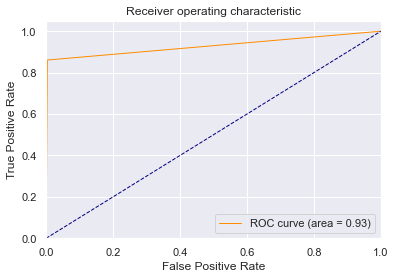

In [93]:
plot_roc(y_train, y_train_xgb)

# Model Fitting - Neural Network

In [94]:
# non_linear_cat_columns
model_cols = linear_cols + non_linear_cols + cat_vars

X_train = train_df[model_cols]
y_train = train_df['customer_category']
X_test = test_df[model_cols]

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(len(model_cols),)),
    keras.layers.Dense(30, activation=tf.nn.relu),
    keras.layers.Dense(30, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid),
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50, batch_size=1)
#test_loss, test_acc = model.evaluate(X_test, y_test)


Train on 10738 samples
Epoch 1/50
10738/10738 [==============================] - 23s 2ms/sample - loss: 0.1082 - accuracy: 0.9703
Epoch 2/50
10738/10738 [==============================] - 24s 2ms/sample - loss: 0.0923 - accuracy: 0.9736
Epoch 3/50
10738/10738 [==============================] - 24s 2ms/sample - loss: 0.0892 - accuracy: 0.9746
Epoch 4/50
10738/10738 [==============================] - 23s 2ms/sample - loss: 0.0882 - accuracy: 0.9744
Epoch 5/50
10738/10738 [==============================] - 23s 2ms/sample - loss: 0.0857 - accuracy: 0.9760
Epoch 6/50
10738/10738 [==============================] - 23s 2ms/sample - loss: 0.0862 - accuracy: 0.9755
Epoch 7/50
10738/10738 [==============================] - 24s 2ms/sample - loss: 0.0841 - accuracy: 0.9763
Epoch 8/50
10738/10738 [==============================] - 23s 2ms/sample - loss: 0.0840 - accuracy: 0.9763
Epoch 9/50
10738/10738 [==============================] - 22s 2ms/sample - loss: 0.0850 - accuracy: 0.9763
Epoch 10/50
10

In [95]:

y_test_nn = model.predict(X_test)
y_test_nn = np.reshape(y_test_nn,len(y_test_nn))
y_test_nn = np.where(y_test_nn>0.91,1,0)

y_train_nn = model.predict(X_train)
y_train_nn = np.reshape(y_train_nn,len(y_train_nn))
y_train_nn = np.where(y_train_nn>0.91,1,0)

final_df_nn = pd.DataFrame({'customer_id':test_df['customer_id'], 'customer_category':y_test_nn})

final_df_nn['customer_category'].value_counts()

final_df_nn.to_csv('fin_sub_nn.csv', index = False)

0    6897
1     263
Name: customer_category, dtype: int64

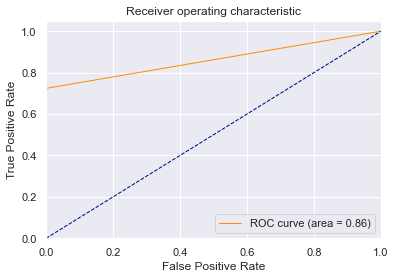

In [96]:
plot_roc(y_train, y_train_nn)

# Combining Models

In [97]:

train_df_with_preds = train_df.copy()
train_df_with_preds['pred_knn'] = y_train_knn
#train_df_with_preds['pred_cat'] = classifier_cat.predict(X_train)
train_df_with_preds['pred_log'] = y_train_log
train_df_with_preds['pred_dt'] = y_train_dt
train_df_with_preds['pred_svm'] = y_train_svc
train_df_with_preds['pred_xgb'] = y_train_xgb
train_df_with_preds['pred_nn'] = y_train_nn

train_df_with_preds.to_csv('train_with_preds.csv', index = False)


In [98]:
test_df_all = pd.DataFrame({'customer_id':test_df['customer_id']})

test_df_all['pred_knn'] = y_test_knn
#test_df_all['pred_cat'] = classifier_cat.predict(X_test)
test_df_all['pred_log'] = y_test_log
test_df_all['pred_dt'] = y_test_dt
test_df_all['pred_svm'] = y_test_svc
test_df_all['pred_xgb'] = y_test_xgb
test_df_all['pred_nn'] = y_test_nn
test_df_all['comb'] = np.where(((test_df_all['pred_knn']==1) & (test_df_all['pred_nn']==1)),1,0)
test_df_all.to_csv('test_df_all.csv', index = False)


In [99]:
test_df_all['comb'].value_counts()

test_fin = test_df_all[['customer_id','comb']].rename(columns = {'comb':'customer_category'})
test_fin.to_csv('final_combined.csv', index = False)


0    6918
1     242
Name: comb, dtype: int64

Final SubmissionEnsemble(combination of knn and neural network)

After careful observation it is found that borderline values are tagged as 1 by most of the models.

So, I combined the KNN model and the Neural Network Models to get the final predicted values.

* Train Accuracy – 98.45 %
* Test Accuracy – 96.74%
* ROC(area) on Train – 0.91


# Setbacks of the current Model

1. KNN and Neural Network outperformed other models because of the strong ability of the models to distinguish between classes.
2. SMOTE and undersampling technique should be added for other models to perform better and to have a consistent performance across datasets.
3. Here, the distribution of the train and test datasets appears to be different, that might be a reason of certain models performing better on train but not on unseen test dataset.


# Recommendation Engine Architecture and ideal metric addition

Assuming the recommendation is for a certain product/category, 

1. New variables corresponding to that particular category can be added to the training data. This is to check the hypothesis whether the customer is consistently shopping for that product/category.
2. If it’s a specific product and customer has shopped frequently in the past, a new variable can be created that will check when will the customer need the product again based on the average time for consumption of the product.
3. Metrics based Customer Browser History can be created to use any cross sell opportunity.
4. Metrics based on customers wishlist and product/category to recommend.
5. Customers Demographic Data can also be added in the current system to check if it has any relation with the target variable.

# Neural Network Stratified k fold cross validation (Best Performance for a single model)

In [100]:
# Binary Classification with Neural Network Stratified k fold cross validation
# Takes around ~2 hours with CPU only environment for this dataset
"""
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

#X = train_df[model_cols]
#y = train_df['customer_category']

# smaller model
def create_smaller():
    # create model
    model = Sequential()
    model.add(Dense(30, input_dim=17, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

estimators = []
#estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_smaller, epochs=50, batch_size=1)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(pipeline, X_train, y_train, cv=kfold)
print("Smaller: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
"""

'\nfrom keras.models import Sequential\nfrom keras.layers import Dense\nfrom keras.wrappers.scikit_learn import KerasClassifier\nfrom sklearn.model_selection import cross_val_score\nfrom sklearn.preprocessing import LabelEncoder\nfrom sklearn.model_selection import StratifiedKFold\nfrom sklearn.preprocessing import StandardScaler\nfrom sklearn.pipeline import Pipeline\n\n#X = train_df[model_cols]\n#y = train_df[\'customer_category\']\n\n# smaller model\ndef create_smaller():\n    # create model\n    model = Sequential()\n    model.add(Dense(30, input_dim=17, activation=\'relu\'))\n    model.add(Dense(1, activation=\'sigmoid\'))\n    # Compile model\n    model.compile(loss=\'binary_crossentropy\', optimizer=\'adam\', metrics=[\'accuracy\'])\n    return model\n\nestimators = []\n#estimators.append((\'standardize\', StandardScaler()))\nestimators.append((\'mlp\', KerasClassifier(build_fn=create_smaller, epochs=50, batch_size=1)))\npipeline = Pipeline(estimators)\nkfold = StratifiedKFold(n